In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
gpu_device = tf.config.experimental.list_physical_devices('GPU')
print(f"Number of GPU = {len(gpu_device)}")
#tf.config.experimental.set_memory_growth(gpu_device[0], True)

Number of GPU = 0


In [3]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Image (#10): Which is digit '3'


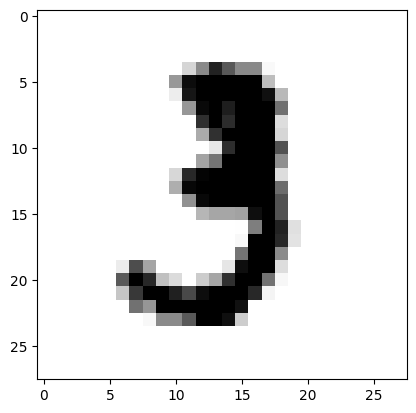

In [4]:
digit = 10 # Change to choose new digit
a = X_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{Y_train[digit]}'")

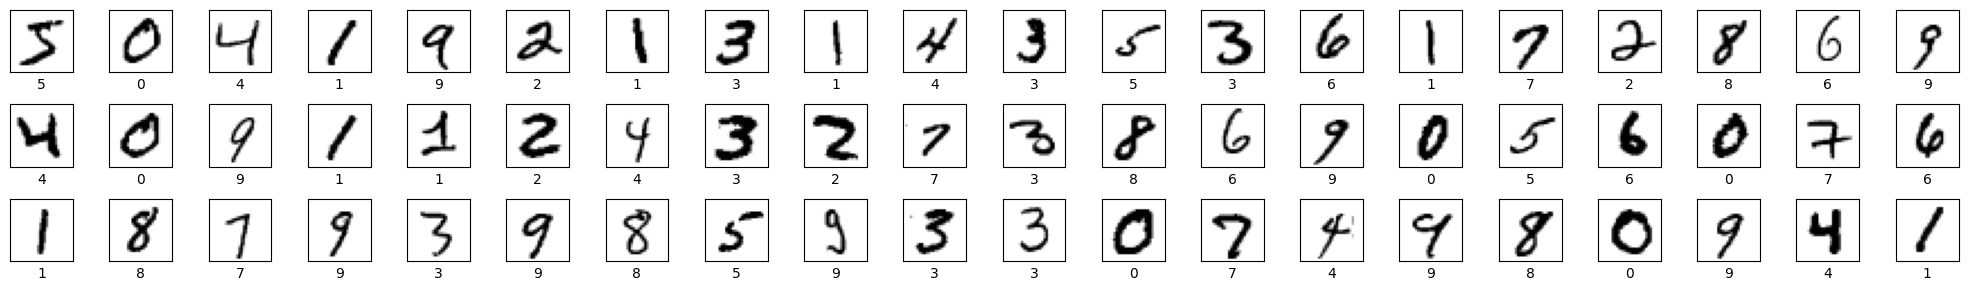

In [5]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [18]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),

    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)         

In [39]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [40]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=64)
k=h

Epoch 1/5
750/750 [==============================] - 45s 59ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0432 - val_accuracy: 0.9887
Epoch 2/5
750/750 [==============================] - 47s 63ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0542 - val_accuracy: 0.9871
Epoch 3/5
750/750 [==============================] - 46s 61ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.0515 - val_accuracy: 0.9880
Epoch 4/5
750/750 [==============================] - 46s 61ms/step - loss: 0.0117 - accuracy: 0.9961 - val_loss: 0.0476 - val_accuracy: 0.9899
Epoch 5/5
750/750 [==============================] - 46s 62ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0570 - val_accuracy: 0.9860


In [25]:
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=64)
k1=h

Epoch 1/5
750/750 [==============================] - 47s 61ms/step - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.0383 - val_accuracy: 0.9907
Epoch 2/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.0386 - val_accuracy: 0.9903
Epoch 3/5
750/750 [==============================] - 45s 61ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0385 - val_accuracy: 0.9907
Epoch 4/5
750/750 [==============================] - 46s 61ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0378 - val_accuracy: 0.9908
Epoch 5/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.0378 - val_accuracy: 0.9907


In [27]:
model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=64)
k2=h

Epoch 1/5
750/750 [==============================] - 48s 63ms/step - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.0580 - val_accuracy: 0.9850
Epoch 2/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0247 - accuracy: 0.9918 - val_loss: 0.0434 - val_accuracy: 0.9882
Epoch 3/5
750/750 [==============================] - 46s 62ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0445 - val_accuracy: 0.9883
Epoch 4/5
750/750 [==============================] - 46s 61ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0482 - val_accuracy: 0.9893
Epoch 5/5
750/750 [==============================] - 45s 60ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0500 - val_accuracy: 0.9888


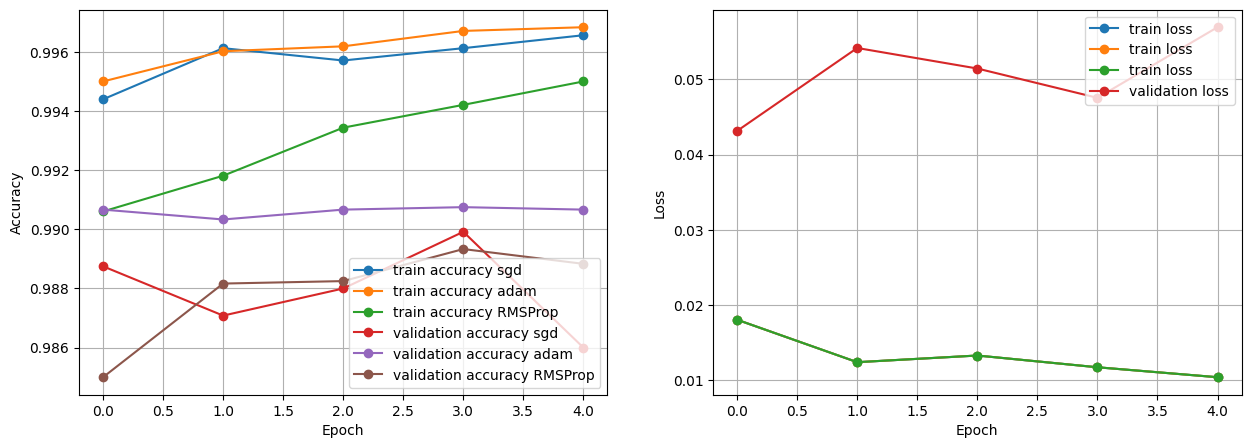

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(k.history['accuracy'], 'o-', label='train accuracy sgd')
plt.plot(k1.history['accuracy'], 'o-', label='train accuracy adam')
plt.plot(k2.history['accuracy'], 'o-', label='train accuracy RMSProp')
plt.plot(k.history['val_accuracy'], 'o-', label = 'validation accuracy sgd')
plt.plot(k1.history['val_accuracy'], 'o-', label = 'validation accuracy adam')
plt.plot(k2.history['val_accuracy'], 'o-', label = 'validation accuracy RMSProp')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [42]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 11ms/step - loss: 0.0523 - accuracy: 0.9879

Test Accuracy: 0.9879000186920166

Test Loss: 0.052321068942546844
